Dada la función $f(x,y)=x^3+y^3-3x-12y+25$

a) Representar la función
b) Calcular los puntos críticos
c) Calcular los extremos relativos de $f$. ¿Alcanza esta función un máximo o un mínimo absoluto?

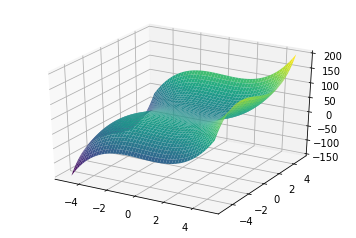

In [1]:
%matplotlib inline
import sympy as sp
x,y=sp.symbols('x,y')
f=x**3+y**3-3*x-12*y+25
from sympy.plotting import plot3d
#Representacion grafica
fig=plot3d(f,(x,-5,5),(y,-5,5))

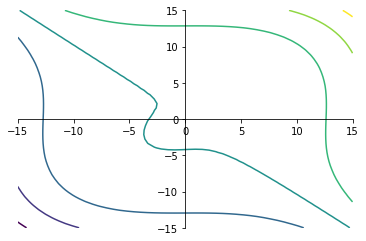

In [2]:
#curvas de nivel con Sympy
from sympy.plotting.plot import ContourSeries, Plot
fig1=Plot(ContourSeries(f,(x,-15,15),(y,-15,15)))
fig1.show()

In [3]:
#fx=sp.diff(f,x)
#fy=sp.diff(f,y)
#print("fx= ", fx)
#print("fy= ", fy)
#Gradiente
grad=[sp.diff(f,c) for c in [x,y]]
fx,fy=grad
print(grad)
#Puntos criticos
ec=[sp.Eq(grad[k],0) for k in range(0,len(grad))]
print(ec)
#puntos criticos
pc=sp.solve(ec,(x,y))
print('Ptos criticos= ', pc)
fx2=[sp.diff(fx,c) for c in [x,y]]
fy2=[sp.diff(fy,c) for c in [x,y]]
#Hessiana
H=sp.Matrix([[sp.diff(fx,c), sp.diff(fy,c)] for c in [x,y]])
detH=H.det()
print("Matriz Hessina= ", H)
print("Determinante Matriz Hessiana= ", detH)
#Miramos si los ptos criticos son extremos relativos
for pto in pc:
    #print("pto= ",pto)
    val_det=detH.subs([(x,pto[0]),(y,pto[1])])
    fxx=H[0,0].subs([(x,pto[0]),(y,pto[1])])
    #print("val_det= ",val_det)
    #print("fxx= ", fxx)
    if (val_det>0 and fxx>0):
        print("El punto ", pto, " es un máximo local")
    elif(val_det>0 and fxx<0):
        print("El punto ", pto, " es un mínimo local")
    elif(val_det<0):
        print("El punto ", pto," no es un extremo relativo")
    else: 
        print("el criterio no decide")

[3*x**2 - 3, 3*y**2 - 12]
[Eq(3*x**2 - 3, 0), Eq(3*y**2 - 12, 0)]
Ptos criticos=  [(-1, -2), (-1, 2), (1, -2), (1, 2)]
Matriz Hessina=  Matrix([[6*x, 0], [0, 6*y]])
Determinante Matriz Hessiana=  36*x*y
El punto  (-1, -2)  es un mínimo local
El punto  (-1, 2)  no es un extremo relativo
El punto  (1, -2)  no es un extremo relativo
El punto  (1, 2)  es un máximo local


In [4]:
def criterio_df2(detH,pto):
    val_det=detH.subs([(x,pto[0]),(y,pto[1])])
    fxx=H[0,0].subs([(x,pto[0]),(y,pto[1])])
    #print("val_det= ",val_det)
    #print("fxx= ", fxx)
    if (val_det>0 and fxx>0):
        print("El punto ", pto, " es un máximo local")
    elif(val_det>0 and fxx<0):
        print("El punto ", pto, " es un mínimo local")
    elif(val_det<0):
        print("El punto ", pto," no es un extremo relativo")
    else: 
        print("el criterio no decide")

for pto in pc:
    criterio_df2(detH,pto)


El punto  (-1, -2)  es un mínimo local
El punto  (-1, 2)  no es un extremo relativo
El punto  (1, -2)  no es un extremo relativo
El punto  (1, 2)  es un máximo local


In [5]:
#Usando matrices Jacobian y Hessian (esto es útil para debugar)
x,y=sp.symbols('x,y')
f=x**3+y**3-3*x-12*y+25
A=sp.Matrix([f])
print(A)
J=A.jacobian(sp.Matrix([x,y]))
print(J)
ec=[sp.Eq(J[k],0) for k in range(0,len(J))]
print(ec)
H=sp.hessian(f,(x,y))
print(H)

Matrix([[x**3 - 3*x + y**3 - 12*y + 25]])
Matrix([[3*x**2 - 3, 3*y**2 - 12]])
[Eq(3*x**2 - 3, 0), Eq(3*y**2 - 12, 0)]
Matrix([[6*x, 0], [0, 6*y]])
